In [1]:
from lattice import *

0 1
([(0, 0, -1), (0, 0, 0), (0, 0, 1)], [], 0)


In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# once we input the configurations, then we can get the total information of the system

def plot_distributions(points):

    # Create a list of all types and values for easier plotting
    all_types = [point[0] for point in points]
    all_values_A = [point[2] for point in points if point[0] == 'Yb']
    all_values_B = [point[2] for point in points if point[0] == 'Tm']

    plt.figure(figsize=(15, 5))

    # Plotting distribution of A, B, C using bar plot

    # 1 row, 3 columns, 1st plot

    plt.subplot(1, 3, 1)
    labels, counts = np.unique(all_types, return_counts=True)
    counts_tmp = dict(zip(labels, counts))
    counts_tmp['Y'] = counts_tmp.setdefault('Y', 0)

    bars = plt.bar(['Yb', 'Tm', 'Y'], [counts_tmp['Yb'], counts_tmp['Tm'], counts_tmp['Y']], color=['blue', 'pink', 'green'], width=0.4)
    plt.ylabel('Count',fontsize=18)
    plt.title('Distribution of three types',fontsize=18)
    plt.xticks(['Yb', 'Tm', 'Y'], ['Sensitizers', 'Emitters', 'Others'],fontsize=16)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom')

    # Plotting value distribution for type A using histogram

    # 1 row, 3 columns, 2nd plot
    plt.subplot(1, 3, 2)
    counts, bins, patches = plt.hist(all_values_A, bins=[0, 1, 2], align='left', rwidth=0.4, color='blue')
    plt.ylabel('Count',fontsize=18)
    plt.title('Value distribution for sensitizers',fontsize=18)
    plt.xticks([0, 1], ['0(Ground state)', '1(Excited state)'],fontsize=16)
    for count, bin, patch in zip(counts, bins, patches):
        plt.text(bin + 0.01, count + 1, int(count), ha='center', va='bottom')

    # Plotting value distribution for type B using histogram


    # 1 row, 3 columns, 3rd plot
    plt.subplot(1, 3, 3)
    counts, bins, patches = plt.hist(all_values_B, bins=[2, 3, 4, 5, 6, 7], align='left', rwidth=0.4, color='pink')

    plt.ylabel('Count',fontsize=18)
    plt.title('Value distribution for emitters',fontsize=18)
    plt.xticks([2, 3, 4, 5, 6], ['G', '1st', '2nd', '3rd', '4th'],fontsize=16)
    for count, bin, patch in zip(counts, bins, patches):
        plt.text(bin + 0.01, count + 1, int(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming points list is defined already
# plot_distributions(points)


In [8]:
na_points, y_points, n_points = new_lattice(0.5, 0.5, 3)

2 4


In [5]:
y_points

[['Tm', (-3.5, -0.5, -2.5), 2],
 ['Tm', (-3.5, -0.5, -1.5), 2],
 ['Yb', (-3.5, -0.5, -0.5), 0],
 ['Yb', (-3.5, -0.5, 0.5), 0],
 ['Tm', (-3.5, -0.5, 1.5), 2],
 ['Yb', (-3.5, -0.5, 2.5), 0],
 ['Yb', (-3.5, 0.5, -3.5), 0],
 ['Tm', (-3.5, 0.5, -2.5), 2],
 ['Tm', (-3.5, 0.5, -1.5), 2],
 ['Tm', (-3.5, 0.5, -0.5), 2],
 ['Tm', (-3.5, 0.5, 0.5), 2],
 ['Tm', (-3.5, 0.5, 1.5), 2],
 ['Yb', (-3.5, 0.5, 2.5), 0],
 ['Tm', (-3.5, 0.5, 3.5), 2],
 ['Yb', (-3.5, 1.5, -4.5), 0],
 ['Yb', (-3.5, 1.5, -3.5), 0],
 ['Tm', (-3.5, 1.5, -2.5), 2],
 ['Yb', (-3.5, 1.5, -1.5), 1],
 ['Yb', (-3.5, 1.5, -0.5), 1],
 ['Yb', (-3.5, 1.5, 0.5), 0],
 ['Tm', (-3.5, 1.5, 1.5), 2],
 ['Yb', (-3.5, 1.5, 2.5), 1],
 ['Tm', (-3.5, 1.5, 3.5), 2],
 ['Tm', (-3.5, 1.5, 4.5), 2],
 ['Tm', (-3.5, 2.5, -4.5), 2],
 ['Yb', (-3.5, 2.5, -3.5), 0],
 ['Tm', (-3.5, 2.5, -2.5), 2],
 ['Yb', (-3.5, 2.5, -1.5), 0],
 ['Tm', (-3.5, 2.5, -0.5), 2],
 ['Yb', (-3.5, 2.5, 0.5), 0],
 ['Yb', (-3.5, 2.5, 1.5), 0],
 ['Yb', (-3.5, 2.5, 2.5), 0],
 ['Yb', (-3.5, 2.

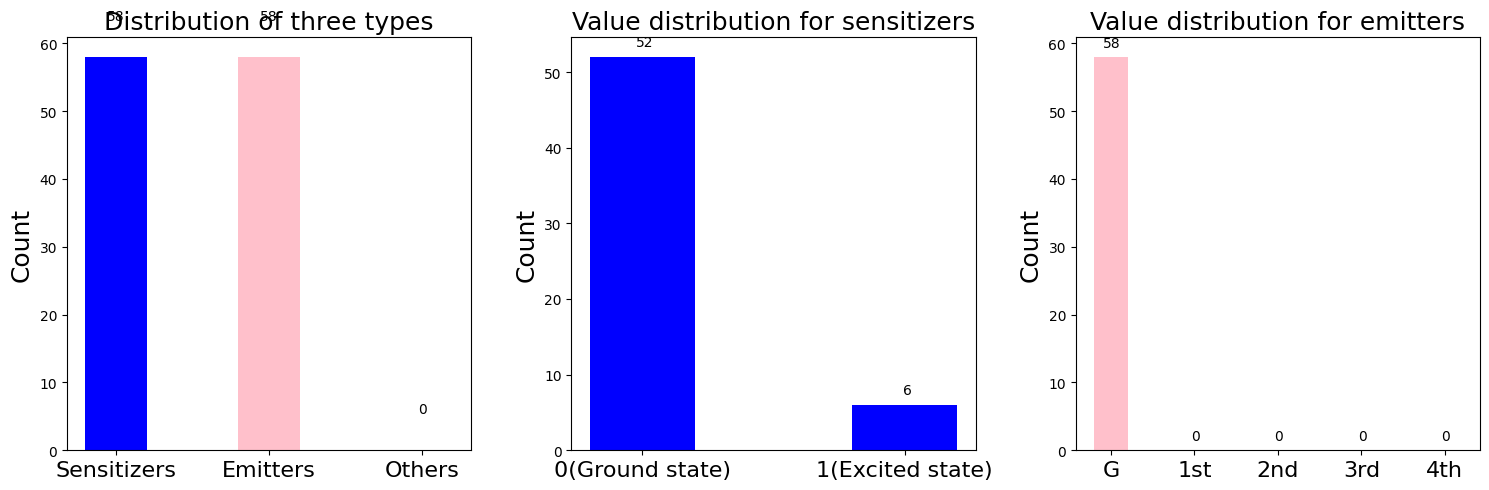

In [9]:
plot_distributions(y_points)

In [10]:
import plotly.graph_objects as go

points = y_points

def plot_3d_points_with_plotly(points):
    # Separate points based on their type (A or B)
    points_A = [point for point in points if point[0] == 'Yb']
    points_B = [point for point in points if point[0] == 'Tm']

    # Extract coordinates and values for points of type A

    x_A = [point[1][0] for point in points_A]
    y_A = [point[1][1] for point in points_A]
    z_A = [point[1][2] for point in points_A]

    values_A = [point[2] for point in points_A]

    # Extract coordinates and values for points of type B
    x_B = [point[1][0] for point in points_B]
    y_B = [point[1][1] for point in points_B]
    z_B = [point[1][2] for point in points_B]
    values_B = [point[2] for point in points_B]

    # Create 3D scatter plots
    trace_A = go.Scatter3d(x=x_A, y=y_A, z=z_A, mode='markers+text',
                           marker=dict(size=6, color='blue', opacity=0.8),
                           text=values_A, textposition='top center')

    trace_B = go.Scatter3d(x=x_B, y=y_B, z=z_B, mode='markers+text',
                           marker=dict(size=6, color='pink', opacity=0.8),
                           text=values_B, textposition='top center')

    # Combine plots and set layout
    data = [trace_A, trace_B]
    layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
    fig = go.Figure(data=data, layout=layout)

    # Display the figure
    fig.show()
points = [(point[0], to_euclidean(point[1]), point[2]) for point in points]
plot_3d_points_with_plotly(points)
